# Business understanding
Let’s say you work for the company Stack Overflow, which is the largest and most trusted online forum for developers to learn, share their skills and build their careers. It is one of the most popular websites for developers, data engineers and data scientists for getting their technical queries answered. More than 50 million experienced and aspiring programmers visit Stack Overflow every month to help users resolve the errors that they encounter while programming and develop new skills. Their products and services focus on developer marketing, technical recruitment, market research and enterprise knowledge sharing.

 

Stack Overflow maintains a website where different users with membership ask and answer questions on various technical topics. The format of such queries includes the title, the body and the tag of the question. These questions can be answered by any user.  


---


# Objective:
Using EDA, help Stack Overflow implement the following features in its web application: 

1. When a user raises a question with a data science tag ('python', 'r', 'matlab', 'sas', 'excel', 'sql'), then Stack Overflow sends the notification to the relevant users.

2. When a user provides a data science tag ('python', 'r', 'matlab', 'sas', 'excel', 'sql') to their question, then Stack Overflow should come up with the expected approximate time to get it answered.

3. While a user raises a question, Stack Overflow wants to provide some suggestions to the users to get their queries answered quickly.

 

Let’s say Stack Overflow also wants to post some details on its job website to help various employees understand the subjects or topics trending in the industry.

 

Also, do further EDA to understand the data set and perform various types of analyses such as univariate, bivariate and segmented univariate analyses.

# Import required libraries and data.

In [1]:
#import the warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install matplotlib
!pip install seaborn
!pip3 install mysql-connector --user

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
#import the useful libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load data set

In [4]:
questions= pd.read_csv("https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Questions.csv",encoding='latin-1',parse_dates=["CreationDate","ClosedDate"],usecols=["Id","OwnerUserId","CreationDate","ClosedDate","Score"])

In [5]:
answers= pd.read_csv("https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Answers.csv",encoding='latin-1',parse_dates=["CreationDate"],usecols=["Id","OwnerUserId","CreationDate","ParentId","Score"])

In [6]:
tags= pd.read_csv("https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Tags.csv",encoding='latin-1')

In [7]:
users= pd.read_csv("https://stack-overflow-casestudy-datasets.s3.amazonaws.com/Users.csv",encoding='latin-1',parse_dates=["creation_date","last_access_date"], index_col=0)

In [8]:
#Print the size (rows and columns) in all the data frames
print("Questions = ",questions.shape," Rows = ",questions.shape[0]," Columns = ",questions.shape[1])
print("Answers = ",answers.shape," Rows = ",answers.shape[0]," Columns = ",answers.shape[1])
print("Tags = ",tags.shape," Rows = ",tags.shape[0]," Columns = ",tags.shape[1])
print("Users = ",users.shape," Rows = ",users.shape[0]," Columns = ",users.shape[1])

questions_rows = questions.shape[0]
answers_rows = answers.shape[0]
tags_rows = tags.shape[0]
users_rows = users.shape[0]


Questions =  (1264216, 5)  Rows =  1264216  Columns =  5
Answers =  (2014516, 5)  Rows =  2014516  Columns =  5
Tags =  (3750994, 2)  Rows =  3750994  Columns =  2
Users =  (1990480, 8)  Rows =  1990480  Columns =  8


# Print the top 5 rows of questions, answers, tags and users dataframe.

In [9]:
questions.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score
0,80,26.0,2008-08-01 13:57:07+00:00,NaT,26
1,90,58.0,2008-08-01 14:41:24+00:00,2012-12-26 03:45:49+00:00,144
2,120,83.0,2008-08-01 15:50:08+00:00,NaT,21
3,180,2089740.0,2008-08-01 18:42:19+00:00,NaT,53
4,260,91.0,2008-08-01 23:22:08+00:00,NaT,49


In [10]:
answers.head()

,Id,OwnerUserId,CreationDate,ParentId,Score
0,92,61.0,2008-08-01 14:45:37+00:00,90,13
1,124,26.0,2008-08-01 16:09:47+00:00,80,12
2,199,50.0,2008-08-01 19:36:46+00:00,180,1
3,269,91.0,2008-08-01 23:49:57+00:00,260,4
4,307,49.0,2008-08-02 01:49:46+00:00,260,28


In [11]:
tags.head()

,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn


In [12]:
users.head()

,id,display_name,creation_date,last_access_date,reputation,up_votes,down_votes,views
0,26,Shawn,2008-08-01 12:18:14.520000+00:00,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547
1,26,Shawn,2008-08-01 12:18:14.520000+00:00,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547
2,26,Shawn,2008-08-01 12:18:14.520000+00:00,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547
3,26,Shawn,2008-08-01 12:18:14.520000+00:00,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547
4,26,Shawn,2008-08-01 12:18:14.520000+00:00,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547


# Data cleaning and manipulation 

### Drop duplicate columns


In [13]:
questions.drop_duplicates(inplace=True)
answers.drop_duplicates(inplace=True)
tags.drop_duplicates(inplace=True)
users.drop_duplicates(inplace=True)

#Print the number of rows dropped
print("Duplicate rows dropped in questions = ",questions_rows - questions.shape[0])
print("Duplicate rows dropped in answers = ",answers_rows - answers.shape[0])
print("Duplicate rows dropped in tags = ",tags_rows - tags.shape[0])
print("Duplicate rows dropped in users = ",users_rows - users.shape[0])

Duplicate rows dropped in questions =  0
Duplicate rows dropped in answers =  0
Duplicate rows dropped in tags =  1
Duplicate rows dropped in users =  1525020


In [14]:
#Print the size (rows and columns) in all the data frames
print("Questions = ",questions.shape," Rows = ",questions.shape[0]," Columns = ",questions.shape[1])
print("Answers = ",answers.shape," Rows = ",answers.shape[0]," Columns = ",answers.shape[1])
print("Tags = ",tags.shape," Rows = ",tags.shape[0]," Columns = ",tags.shape[1])
print("Users = ",users.shape," Rows = ",users.shape[0]," Columns = ",users.shape[1])

questions_rows = questions.shape[0]
answers_rows = answers.shape[0]
tags_rows = tags.shape[0]
users_rows = users.shape[0]

Questions =  (1264216, 5)  Rows =  1264216  Columns =  5
Answers =  (2014516, 5)  Rows =  2014516  Columns =  5
Tags =  (3750993, 2)  Rows =  3750993  Columns =  2
Users =  (465460, 8)  Rows =  465460  Columns =  8


### Questions dataframe

In [15]:
#print the information of questions dataframe
questions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1264216 entries, 0 to 1264215
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype              
---  ------        --------------    -----              
 0   Id            1264216 non-null  int64              
 1   OwnerUserId   1249762 non-null  float64            
 2   CreationDate  1264216 non-null  datetime64[ns, UTC]
 3   ClosedDate    55959 non-null    datetime64[ns, UTC]
 4   Score         1264216 non-null  int64              
dtypes: datetime64[ns, UTC](2), float64(1), int64(2)
memory usage: 57.9 MB


Basic analysis on questions dataframe.
1. There are null values in OwnerUserId, ClosedDate.
2. Datatype of dates are object, which can be converted to date type.
3. Datatype of OwnerUserId is float which should be converted to int. 

We will perform the specifc action to correct the data based on above points.

In [16]:
#Print the count of null values in each columns
questions.isna().sum()

Id                    0
OwnerUserId       14454
CreationDate          0
ClosedDate      1208257
Score                 0
dtype: int64

Null ClosedDate defined that the question is not closed. So, we can ignore those for now.

We have 14454 rows where owner user id is not available, But user id is our target value of analysis. So, we will drop the rows with null user ids.

In [17]:
questions = questions[~questions["OwnerUserId"].isna() == True]

In [18]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249762 entries, 0 to 1264215
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype              
---  ------        --------------    -----              
 0   Id            1249762 non-null  int64              
 1   OwnerUserId   1249762 non-null  float64            
 2   CreationDate  1249762 non-null  datetime64[ns, UTC]
 3   ClosedDate    55240 non-null    datetime64[ns, UTC]
 4   Score         1249762 non-null  int64              
dtypes: datetime64[ns, UTC](2), float64(1), int64(2)
memory usage: 57.2 MB


Convert the datatype of OwnerUserId to int from float.

In [19]:
questions["OwnerUserId"] = questions["OwnerUserId"].astype("int")

Create a column with time taken to close.

In [20]:
questions["TimeTakenToClose"] = questions['ClosedDate']-questions['CreationDate']

In [21]:
questions.head()  

,Id,OwnerUserId,CreationDate,ClosedDate,Score,TimeTakenToClose
0,80,26,2008-08-01 13:57:07+00:00,NaT,26,NaT
1,90,58,2008-08-01 14:41:24+00:00,2012-12-26 03:45:49+00:00,144,1607 days 13:04:25
2,120,83,2008-08-01 15:50:08+00:00,NaT,21,NaT
3,180,2089740,2008-08-01 18:42:19+00:00,NaT,53,NaT
4,260,91,2008-08-01 23:22:08+00:00,NaT,49,NaT


In [22]:
questions_id_createdDate = questions[["Id","CreationDate"]]
questions_id_createdDate.rename(columns={"Id":"QuestionId","CreationDate":"QuestionCreationDate"},inplace=True)

In [23]:
questions_id_createdDate.head()

,QuestionId,QuestionCreationDate
0,80,2008-08-01 13:57:07+00:00
1,90,2008-08-01 14:41:24+00:00
2,120,2008-08-01 15:50:08+00:00
3,180,2008-08-01 18:42:19+00:00
4,260,2008-08-01 23:22:08+00:00


### Answers dataframe

In [24]:
#print the information of answers dataframe
answers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2014516 entries, 0 to 2014515
Data columns (total 5 columns):
 #   Column        Dtype              
---  ------        -----              
 0   Id            int64              
 1   OwnerUserId   float64            
 2   CreationDate  datetime64[ns, UTC]
 3   ParentId      int64              
 4   Score         int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(3)
memory usage: 92.2 MB


In [25]:
answers = answers[~answers["OwnerUserId"].isna() == True]

In [26]:
answers["OwnerUserId"] = answers["OwnerUserId"].astype("int")

In [27]:
answers.head()

,Id,OwnerUserId,CreationDate,ParentId,Score
0,92,61,2008-08-01 14:45:37+00:00,90,13
1,124,26,2008-08-01 16:09:47+00:00,80,12
2,199,50,2008-08-01 19:36:46+00:00,180,1
3,269,91,2008-08-01 23:49:57+00:00,260,4
4,307,49,2008-08-02 01:49:46+00:00,260,28


In [28]:
answers = answers.merge(questions_id_createdDate, how='left',left_on='ParentId',right_on="QuestionId",validate="m:1")

In [29]:
answers.drop(columns="QuestionId",inplace=True)

In [30]:
answers["TimetakenToAnswerInMinutes"] = (answers['CreationDate'] - answers['QuestionCreationDate'])/ np.timedelta64(1, 'm')

In [31]:
answers.head()

,Id,OwnerUserId,CreationDate,ParentId,Score,QuestionCreationDate,TimetakenToAnswerInMinutes
0,92,61,2008-08-01 14:45:37+00:00,90,13,2008-08-01 14:41:24+00:00,4.216667
1,124,26,2008-08-01 16:09:47+00:00,80,12,2008-08-01 13:57:07+00:00,132.666667
2,199,50,2008-08-01 19:36:46+00:00,180,1,2008-08-01 18:42:19+00:00,54.450000
3,269,91,2008-08-01 23:49:57+00:00,260,4,2008-08-01 23:22:08+00:00,27.816667
4,307,49,2008-08-02 01:49:46+00:00,260,28,2008-08-01 23:22:08+00:00,147.633333


In [32]:
answers[answers["TimetakenToAnswerInMinutes"] < 0]

,Id,OwnerUserId,CreationDate,ParentId,Score,QuestionCreationDate,TimetakenToAnswerInMinutes
613,15782,1886,2008-08-19 06:00:46+00:00,100420,2,2008-09-19 08:10:54+00:00,-44770.133333
616,15786,91,2008-08-19 06:10:47+00:00,100420,2,2008-09-19 08:10:54+00:00,-44760.116667
617,15821,1075,2008-08-19 07:08:00+00:00,100420,14,2008-09-19 08:10:54+00:00,-44702.900000
621,15968,1169,2008-08-19 10:47:08+00:00,100420,4,2008-09-19 08:10:54+00:00,-44483.766667
1770,38932,3892,2008-09-02 06:35:40+00:00,100420,7,2008-09-19 08:10:54+00:00,-24575.233333
...,...,...,...,...,...,...,...
1482023,28922624,3602436,2015-03-08 03:03:14+00:00,28922570,0,2015-03-08 03:53:37+00:00,-50.383333
1482024,28922650,4013790,2015-03-08 03:07:53+00:00,28922570,0,2015-03-08 03:53:37+00:00,-45.733333
1482029,28922769,3214063,2015-03-08 03:28:02+00:00,28922430,0,2015-03-08 03:31:53+00:00,-3.850000
1720358,34018783,3110834,2015-12-01 11:03:11+00:00,34021050,1,2015-12-01 12:57:55+00:00,-114.733333


If we get a negative time, that means question created data is after the answered date which implies it as wrong data as question can not be created after answer is provided. SO, we will drop these rows

In [33]:
answers = answers[~(answers["TimetakenToAnswerInMinutes"] < 0)]

In [34]:
#clear the temp dataframes created
del questions_id_createdDate

### Tags dataframe

In [35]:
#print the information of tags dataframe
tags.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3750993 entries, 0 to 3750993
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Tag     object
dtypes: int64(1), object(1)
memory usage: 85.9+ MB


The are rows with null tags which points to the below statements.
1. Question does not have any tags.
2. Question have an empty tags.

In both the scenario we can drop the rows.

In [36]:
#Drop the rows with null tags.
tags = tags[~tags["Tag"].isna() == True]

Convert the Tag column to string

In [37]:
tags['Tag'] = tags['Tag'].astype(str)

In [38]:
#Verify there are no rows with null tags in dataframe.
tags.isna().sum()

Id     0
Tag    0
dtype: int64

### Users dataframe

In [39]:
#print the information of users dataframe
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465460 entries, 0 to 1990479
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   id                465460 non-null  int64              
 1   display_name      465436 non-null  object             
 2   creation_date     465460 non-null  datetime64[ns, UTC]
 3   last_access_date  465460 non-null  datetime64[ns, UTC]
 4   reputation        465460 non-null  int64              
 5   up_votes          465460 non-null  int64              
 6   down_votes        465460 non-null  int64              
 7   views             465460 non-null  int64              
dtypes: datetime64[ns, UTC](2), int64(5), object(1)
memory usage: 32.0+ MB


There are no rows or columns with null values. 
Only display names have 4 null values, but display_name is not important for our analysis. So, we can drop the columsn all together.

Datatypes of all integer values are int and date values are datetime.

In [40]:
users.drop(labels="display_name",axis = 1,inplace=True)

#### Create a column with number of questions asked and no of answers given by each user.

In [41]:
noOfQuestionsAskedByUser = questions["OwnerUserId"].value_counts()
noOfQuestionsAskedByUser = noOfQuestionsAskedByUser.to_frame(name="noOfQuestionsAskedByUser") 

In [42]:
noOfAnswersGivenByUser = answers["OwnerUserId"].value_counts()
noOfAnswersGivenByUser = noOfAnswersGivenByUser.to_frame(name="noOfAnswersGivenByUser")

Merge the noOfQuestionsAskedByUser and noOfAnswersGivenByUser into users dataframe.

In [43]:
users = users.merge(noOfQuestionsAskedByUser, how='left',left_on='id',right_index=True)

In [44]:
users = users.merge(noOfAnswersGivenByUser, how='left',left_on='id',right_index=True)

In [45]:
users.head()

,id,creation_date,last_access_date,reputation,up_votes,down_votes,views,noOfQuestionsAskedByUser,noOfAnswersGivenByUser
0,26,2008-08-01 12:18:14.520000+00:00,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547,16.0,27.0
27,1109,2008-08-12 12:16:58.610000+00:00,2019-08-31 11:39:52.280000+00:00,116072,457,136,6905,5.0,58.0
85,364174,2010-06-11 03:34:57.137000+00:00,2019-08-29 18:37:35.027000+00:00,325,25,1,60,2.0,2.0
87,61,2008-08-01 14:21:00.573000+00:00,2019-08-30 07:11:58.297000+00:00,22779,1321,219,1731,3.0,10.0
97,20709,2008-09-22 20:03:39.710000+00:00,2019-09-01 01:17:38.133000+00:00,978,73,2,96,NaN,2.0


In [46]:
users.reset_index(inplace=True)

In [47]:
users.fillna(value = 0, inplace=True)

In [48]:
users.drop(columns="index",inplace=True)

In [49]:
users["noOfQuestionsAskedByUser"] = users["noOfQuestionsAskedByUser"].astype("int")

In [50]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465460 entries, 0 to 465459
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype              
---  ------                    --------------   -----              
 0   id                        465460 non-null  int64              
 1   creation_date             465460 non-null  datetime64[ns, UTC]
 2   last_access_date          465460 non-null  datetime64[ns, UTC]
 3   reputation                465460 non-null  int64              
 4   up_votes                  465460 non-null  int64              
 5   down_votes                465460 non-null  int64              
 6   views                     465460 non-null  int64              
 7   noOfQuestionsAskedByUser  465460 non-null  int64              
 8   noOfAnswersGivenByUser    465460 non-null  float64            
dtypes: datetime64[ns, UTC](2), float64(1), int64(6)
memory usage: 32.0 MB


In [51]:
#clear the temp dataframe 
del noOfQuestionsAskedByUser
del noOfAnswersGivenByUser

## Create a column with tags ',' seperated in question dataframe

In [52]:
tagsForQuestion = tags.groupby('Id')['Tag'].apply(sorted).apply(lambda tags: ','.join(tags)).to_frame()

In [53]:
questions = questions.merge(tagsForQuestion, how='left',left_on='Id',right_on="Id")

In [54]:
questions['Tag'] = questions['Tag'].astype(str)

In [55]:
questions.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,TimeTakenToClose,Tag
0,80,26,2008-08-01 13:57:07+00:00,NaT,26,NaT,"actionscript-3,air,flex"
1,90,58,2008-08-01 14:41:24+00:00,2012-12-26 03:45:49+00:00,144,1607 days 13:04:25,"branch,branching-and-merging,svn,tortoisesvn"
2,120,83,2008-08-01 15:50:08+00:00,NaT,21,NaT,"asp.net,sitemap,sql"
3,180,2089740,2008-08-01 18:42:19+00:00,NaT,53,NaT,"algorithm,color-space,colors,language-agnostic"
4,260,91,2008-08-01 23:22:08+00:00,NaT,49,NaT,".net,c#,compiler-construction,scripting"


In [56]:
tags_with_count = tags["Tag"].value_counts().to_frame()

In [57]:
tags_with_count.reset_index(inplace=True)

In [58]:
tags_with_count.columns = ["Tag","Count"]

In [59]:
tags_with_count.head()

,Tag,Count
0,javascript,124155
1,java,115212
2,c#,101186
3,php,98808
4,android,90659


Create a list of top 100 tags and datascience tags.

In [60]:
top_100_tags = tags_with_count["Tag"][0:100]
dataScienceTag = ['python', 'r', 'matlab', 'sas', 'excel', 'sql']

## Create a column with number of answers available for each question

In [61]:
answers.head()

,Id,OwnerUserId,CreationDate,ParentId,Score,QuestionCreationDate,TimetakenToAnswerInMinutes
0,92,61,2008-08-01 14:45:37+00:00,90,13,2008-08-01 14:41:24+00:00,4.216667
1,124,26,2008-08-01 16:09:47+00:00,80,12,2008-08-01 13:57:07+00:00,132.666667
2,199,50,2008-08-01 19:36:46+00:00,180,1,2008-08-01 18:42:19+00:00,54.450000
3,269,91,2008-08-01 23:49:57+00:00,260,4,2008-08-01 23:22:08+00:00,27.816667
4,307,49,2008-08-02 01:49:46+00:00,260,28,2008-08-01 23:22:08+00:00,147.633333


In [62]:
noOfAnswersForEachQuestion = answers['ParentId'].value_counts().to_frame(name="noOfAnswersForQuestion")

In [63]:
questions = questions.merge(noOfAnswersForEachQuestion, how='left',left_on='Id',right_index=True)

In [64]:
questions['noOfAnswersForQuestion'].fillna(value = 0, inplace=True)
questions['noOfAnswersForQuestion'] = questions['noOfAnswersForQuestion'].astype(int)

In [65]:
questions.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,TimeTakenToClose,Tag,noOfAnswersForQuestion
0,80,26,2008-08-01 13:57:07+00:00,NaT,26,NaT,"actionscript-3,air,flex",3
1,90,58,2008-08-01 14:41:24+00:00,2012-12-26 03:45:49+00:00,144,1607 days 13:04:25,"branch,branching-and-merging,svn,tortoisesvn",3
2,120,83,2008-08-01 15:50:08+00:00,NaT,21,NaT,"asp.net,sitemap,sql",1
3,180,2089740,2008-08-01 18:42:19+00:00,NaT,53,NaT,"algorithm,color-space,colors,language-agnostic",9
4,260,91,2008-08-01 23:22:08+00:00,NaT,49,NaT,".net,c#,compiler-construction,scripting",9


In [66]:
#clear temp dataframe
del noOfAnswersForEachQuestion

## Create two column in question datafame with boolean value True/False.
* Column to define whether questions has tag from top 100.
* Column to define whether question has data science tag.

In [67]:
def doesQuestionHaveDataScienceTag(tagsFromQuestion):
  if tagsFromQuestion.strip() == "":
    return False

  listOfTagsFromQuestion = tagsFromQuestion.strip().split(",")
  for tag in dataScienceTag:
    if tag in listOfTagsFromQuestion:
      return True
    else:
      continue
  
  return False

def doesQuestionHaveTopHundredTags(tagsFromQuestion):
  if tagsFromQuestion.strip() == "":
    return False

  listOfTagsFromQuestion = tagsFromQuestion.strip().split(",")
  for tag in top_100_tags:
    if tag in listOfTagsFromQuestion:
      return True
    else:
      continue
  
  return False

In [68]:
questions['DataScienceQuestion'] = questions['Tag'].apply(lambda tags:doesQuestionHaveDataScienceTag(tags))
questions['TagInTopHundred'] = questions['Tag'].apply(lambda tags:doesQuestionHaveTopHundredTags(tags))

## Before we get into the data analysis, let's print top 5 rows in each dataframe to see whether we have all the required columns populated.

In [69]:
questions.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,TimeTakenToClose,Tag,noOfAnswersForQuestion,DataScienceQuestion,TagInTopHundred
0,80,26,2008-08-01 13:57:07+00:00,NaT,26,NaT,"actionscript-3,air,flex",3,False,False
1,90,58,2008-08-01 14:41:24+00:00,2012-12-26 03:45:49+00:00,144,1607 days 13:04:25,"branch,branching-and-merging,svn,tortoisesvn",3,False,False
2,120,83,2008-08-01 15:50:08+00:00,NaT,21,NaT,"asp.net,sitemap,sql",1,True,True
3,180,2089740,2008-08-01 18:42:19+00:00,NaT,53,NaT,"algorithm,color-space,colors,language-agnostic",9,False,True
4,260,91,2008-08-01 23:22:08+00:00,NaT,49,NaT,".net,c#,compiler-construction,scripting",9,False,True


In [70]:
answers.head()

,Id,OwnerUserId,CreationDate,ParentId,Score,QuestionCreationDate,TimetakenToAnswerInMinutes
0,92,61,2008-08-01 14:45:37+00:00,90,13,2008-08-01 14:41:24+00:00,4.216667
1,124,26,2008-08-01 16:09:47+00:00,80,12,2008-08-01 13:57:07+00:00,132.666667
2,199,50,2008-08-01 19:36:46+00:00,180,1,2008-08-01 18:42:19+00:00,54.450000
3,269,91,2008-08-01 23:49:57+00:00,260,4,2008-08-01 23:22:08+00:00,27.816667
4,307,49,2008-08-02 01:49:46+00:00,260,28,2008-08-01 23:22:08+00:00,147.633333


In [71]:
users.head()

,id,creation_date,last_access_date,reputation,up_votes,down_votes,views,noOfQuestionsAskedByUser,noOfAnswersGivenByUser
0,26,2008-08-01 12:18:14.520000+00:00,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547,16,27.0
1,1109,2008-08-12 12:16:58.610000+00:00,2019-08-31 11:39:52.280000+00:00,116072,457,136,6905,5,58.0
2,364174,2010-06-11 03:34:57.137000+00:00,2019-08-29 18:37:35.027000+00:00,325,25,1,60,2,2.0
3,61,2008-08-01 14:21:00.573000+00:00,2019-08-30 07:11:58.297000+00:00,22779,1321,219,1731,3,10.0
4,20709,2008-09-22 20:03:39.710000+00:00,2019-09-01 01:17:38.133000+00:00,978,73,2,96,0,2.0


# Data Analysis

TagInTopHundred  DataScienceQuestion
True             False                  0.732090
False            False                  0.163322
True             True                   0.104153
False            True                   0.000435
dtype: float64


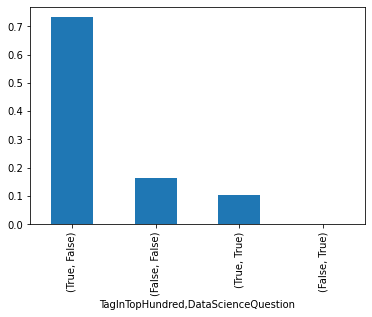

In [72]:
valueCountsOfTopTagsAndDataScience = questions[['TagInTopHundred','DataScienceQuestion']].value_counts(normalize=True)
print(valueCountsOfTopTagsAndDataScience)
ax = valueCountsOfTopTagsAndDataScience.plot(kind='bar')
plt.show()

The above analysis clearly tells that majority of the datascience questions have top 100 tags, where are there are few questions which does not have tags from top 100 but comes under data science question.
The above point proves that there is some specific datascience tag which is not in top 100 tags.


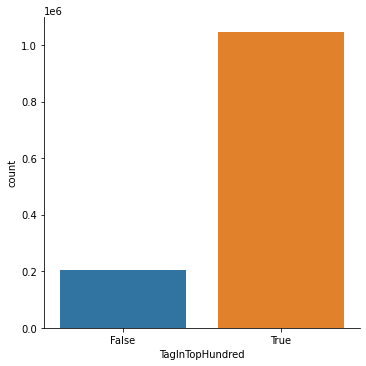

In [73]:
sns.catplot(x='TagInTopHundred',kind="count", data = questions)
plt.show()

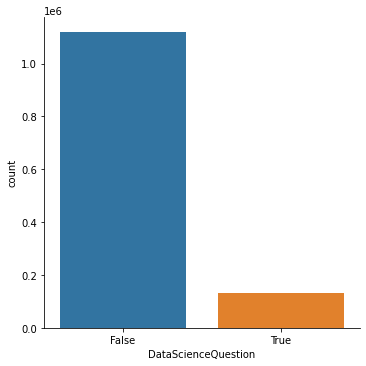

In [74]:
sns.catplot(x='DataScienceQuestion',kind="count", data = questions)
plt.show()

If we observe the bar graphs it is clear that majority of the questions does not have datascience tags where as moajority of the questions have tags from top 100.

In [75]:
print("Percentage of datascience questions: ",len(questions[questions['DataScienceQuestion'] == True])/len(questions)*100, " :: Number of datascience questions : ",len(questions[questions['DataScienceQuestion'] == True]))
print("Percentage of questions which are not related to datascience: ",len(questions[questions['DataScienceQuestion'] == False])/len(questions)*100, " :: Number of questions which are not related to datascience: ",len(questions[questions['DataScienceQuestion'] == False]))

Percentage of datascience questions:  10.458791353873778  :: Number of datascience questions :  130710
Percentage of questions which are not related to datascience:  89.54120864612622  :: Number of questions which are not related to datascience:  1119052


In [76]:
print("Percentage of questions with top 100 tags: ",len(questions[questions['TagInTopHundred'] == True])/len(questions)*100, " :: Number of questions with top 100 tags: ",len(questions[questions['TagInTopHundred'] == True]))
print("Percentage of questions without top 100 tags: ",len(questions[questions['TagInTopHundred'] == False])/len(questions)*100, " :: Number of questions without top 100 tags: ",len(questions[questions['TagInTopHundred'] == False]))

Percentage of questions with top 100 tags:  83.6242420556874  :: Number of questions with top 100 tags:  1045104
Percentage of questions without top 100 tags:  16.375757944312596  :: Number of questions without top 100 tags:  204658


In [77]:
questionsWithPopularTags = questions[questions['TagInTopHundred'] == True]
questionsWithLesspopularTags = questions[questions['TagInTopHundred'] == False]
dataScienceQuestion = questions[questions['DataScienceQuestion'] == True]

No of answers provided for questions which have tags from top 100.

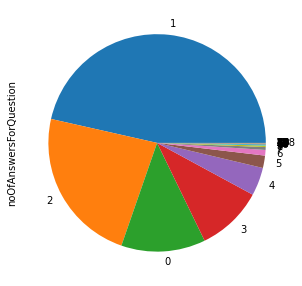

In [78]:
plt.figure(figsize=(5,5))
questionsWithPopularTags['noOfAnswersForQuestion'].value_counts().plot.pie()
plt.show()

No of answers provided for questions which does not have tags from top 100.

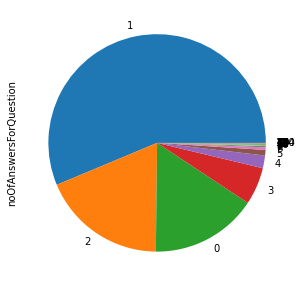

In [79]:
plt.figure(figsize=(5,5))
questionsWithLesspopularTags['noOfAnswersForQuestion'].value_counts().plot.pie()
plt.show()

No of answers provided for datascience questions.

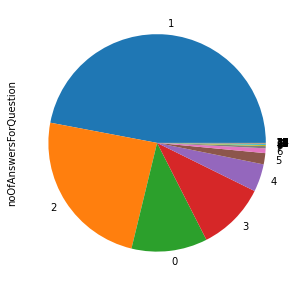

In [80]:
plt.figure(figsize=(5,5))
dataScienceQuestion['noOfAnswersForQuestion'].value_counts().plot.pie()
plt.show()

In [81]:
questionsWithPopularTags['noOfAnswersForQuestion'].mean()

1.6295000306189624

In [82]:
print("Avg no of answers with popular tags: ", questionsWithPopularTags['noOfAnswersForQuestion'].mean())
print("Avg no of answers without popular tags: ", questionsWithLesspopularTags['noOfAnswersForQuestion'].mean())
print("Avg no of answers for questions with datascience tags: ", dataScienceQuestion['noOfAnswersForQuestion'].mean())

Avg no of answers with popular tags:  1.6295000306189624
Avg no of answers without popular tags:  1.3080895933704033
Avg no of answers for questions with datascience tags:  1.622836814321781


Based on the aboue results we have 83.62% of questions which have tags from top 100 and 16.74 percent without tags from top 100.

Out of all the question only 10% of questions are related to data science.

But it is not true that questions with popular tags get more answers compared to questions with less popular tags.

Even the average is number of answers is also the same.

---
Does questions with negative score have less populare tags?

In [83]:
print("Pencentage of questions without top 100 popular tags have score <= 0 is : ",len(questionsWithLesspopularTags[questionsWithLesspopularTags['Score'] <= 0])/len(questionsWithLesspopularTags)*100)
print("Pencentage of questions without top 100 popular tags have score > 0 is : ",len(questionsWithLesspopularTags[questionsWithLesspopularTags['Score'] > 0])/len(questionsWithLesspopularTags)*100)

Pencentage of questions without top 100 popular tags have score <= 0 is :  52.039500043975806
Pencentage of questions without top 100 popular tags have score > 0 is :  47.960499956024194


In [84]:
print("Pencentage of questions with top 100 popular tags have score <= 0 is : ",len(questionsWithPopularTags[questionsWithPopularTags['Score'] <= 0])/len(questionsWithPopularTags)*100)
print("Pencentage of questions with top 100 popular tags have score > 0 is : ",len(questionsWithPopularTags[questionsWithPopularTags['Score'] > 0])/len(questionsWithPopularTags)*100)

Pencentage of questions with top 100 popular tags have score <= 0 is :  53.32320993891517
Pencentage of questions with top 100 popular tags have score > 0 is :  46.67679006108483


Our assumptions about *Questions with negative points does not have popular tags* is worng. The above results clearly show that getting negative score does not have anything to do with popularirty of the tag.

Does question with high score have more number of answers?

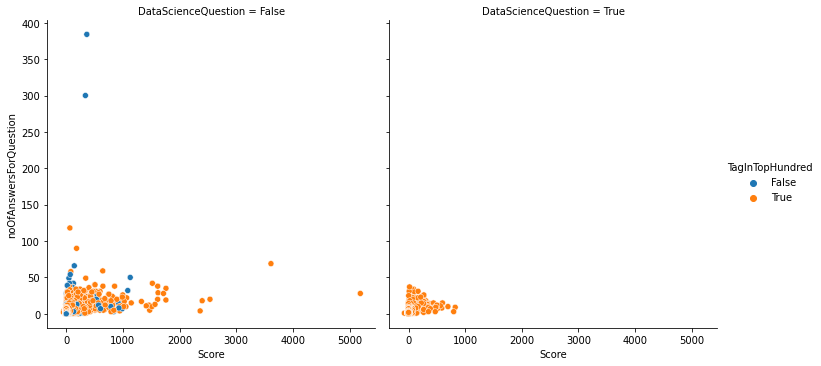

In [85]:
sns.relplot(x="Score", y="noOfAnswersForQuestion",col='DataScienceQuestion', hue="TagInTopHundred", data=questions)
plt.show()

There is no clear trend, but we can say that the question with high scores does not always have more no of answers.But there are few outliers whicha re valid in our case. So, we will not remove those.

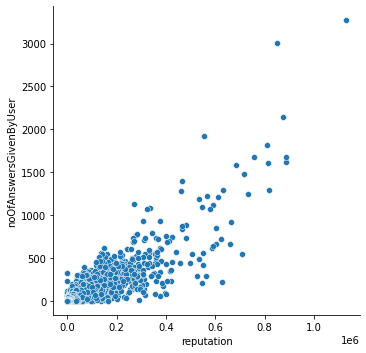

In [86]:
sns.relplot(x="reputation", y="noOfAnswersGivenByUser", data=users)
plt.show()

The above graph establish the relationshp between reputation and no of answers given by the user.
As the reputation increases the no of answers give is also increased.

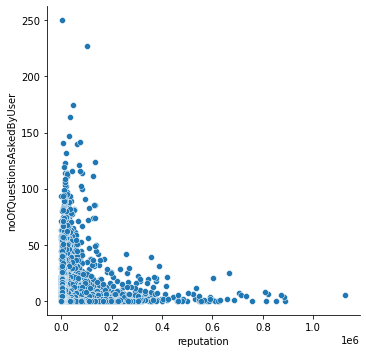

In [87]:
sns.relplot(x="reputation", y="noOfQuestionsAskedByUser", data=users)
plt.show()

We understand from this above graphs that users with higher reputation tend to answer more and ask less questions. 

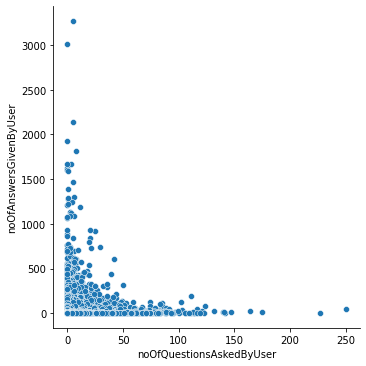

In [88]:
sns.relplot(x="noOfQuestionsAskedByUser", y="noOfAnswersGivenByUser", data=users)
plt.show()

The above plot says that the ppl who asked more questions answered less and who answered more questions asked less.

Let us convert the reputation into categorical value as mentioned below for better usage and analysis.

* 0 - 90 percentile : Low
* 90 - 98 percentile : Medium
* 98 - 99 percentile : High
* 99 - 100 percentile : Very High

In [89]:
users['reputationBucket'] = pd.qcut(users['reputation'], [0,0.9,0.98,0.99,1], labels=["L","M","H","VH"])
users['reputationBucket'].value_counts()

L     418916
M      37234
H       4655
VH      4655
Name: reputationBucket, dtype: int64

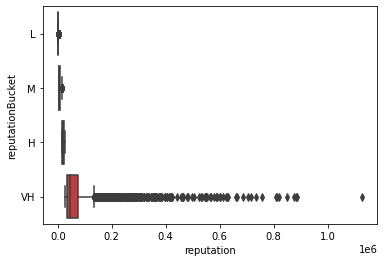

In [90]:
sns.boxplot(data = users, x = users['reputation'],y=users['reputationBucket'])
plt.show()

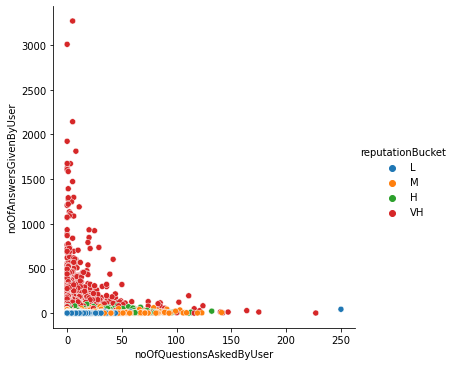

In [91]:
sns.relplot(x="noOfQuestionsAskedByUser", y="noOfAnswersGivenByUser",hue="reputationBucket", data=users)
plt.show()

The above plot proves our assumption is right about the reputation and no of question asked, no of answers given.

Let's calculate the median time taken in minutes.

Reason to choose 60% is, it defines that user provided 60% of answered  less than the approx time. So, when a new question is raised there will be 60% chance the user will respond in that time frame.

In [92]:
avgTimetakenToAnswerInMinites = answers.groupby('OwnerUserId')['TimetakenToAnswerInMinutes'].quantile(0.6).to_frame()
avgTimetakenToAnswerInMinites.rename(columns={"TimetakenToAnswerInMinutes":"ApproxTimeTakenToAnswerInMinutes"},inplace=True)

In [93]:
users = users.merge(avgTimetakenToAnswerInMinites, how='left',left_on='id',right_on="OwnerUserId")

In [94]:
users.head()

,id,creation_date,last_access_date,reputation,up_votes,down_votes,views,noOfQuestionsAskedByUser,noOfAnswersGivenByUser,reputationBucket,ApproxTimeTakenToAnswerInMinutes
0,26,2008-08-01 12:18:14.520000+00:00,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547,16,27.0,M,26.100000
1,1109,2008-08-12 12:16:58.610000+00:00,2019-08-31 11:39:52.280000+00:00,116072,457,136,6905,5,58.0,VH,270.086667
2,364174,2010-06-11 03:34:57.137000+00:00,2019-08-29 18:37:35.027000+00:00,325,25,1,60,2,2.0,L,675723.916667
3,61,2008-08-01 14:21:00.573000+00:00,2019-08-30 07:11:58.297000+00:00,22779,1321,219,1731,3,10.0,H,96.596667
4,20709,2008-09-22 20:03:39.710000+00:00,2019-09-01 01:17:38.133000+00:00,978,73,2,96,0,2.0,L,64455.090000


In [95]:
users['noOfAnswersGivenByUser'] = users['noOfAnswersGivenByUser'].astype(int)

In [96]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465460 entries, 0 to 465459
Data columns (total 11 columns):
 #   Column                            Non-Null Count   Dtype              
---  ------                            --------------   -----              
 0   id                                465460 non-null  int64              
 1   creation_date                     465460 non-null  datetime64[ns, UTC]
 2   last_access_date                  465460 non-null  datetime64[ns, UTC]
 3   reputation                        465460 non-null  int64              
 4   up_votes                          465460 non-null  int64              
 5   down_votes                        465460 non-null  int64              
 6   views                             465460 non-null  int64              
 7   noOfQuestionsAskedByUser          465460 non-null  int64              
 8   noOfAnswersGivenByUser            465460 non-null  int64              
 9   reputationBucket                  465460 non-nul

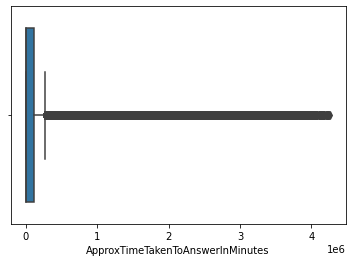

In [97]:
sns.boxplot(data = users, x = users['ApproxTimeTakenToAnswerInMinutes'])
plt.show()

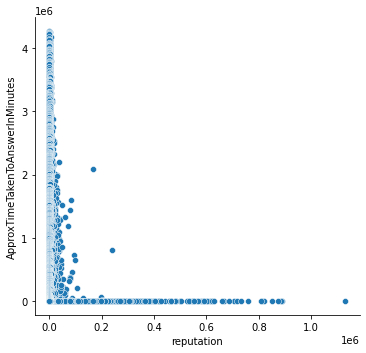

In [98]:
sns.relplot(x="reputation",y="ApproxTimeTakenToAnswerInMinutes", data=users)
plt.show()

We assumed *Users who have more reputation can be trusted in getting the quick answers*, The above graph also explains the same that users with more reputation tend to answer quick. 

Let us categoriase the users with their response speed.

* 0 - 15 percentile : Vary Fast
* 15 - 30 percentile : Fast
* 30 - 70 percentile : Medium
* 70 - 85 percentile : Slow
* 85 - 100 percentile : Very Slow

In [99]:
users['ApproxTimeTakenToAnswerInMinutesBucket'] = pd.qcut(users['ApproxTimeTakenToAnswerInMinutes'], [0,0.15,0.30,0.70,0.85,1], labels=["VF","F","M","S","VS"])
users['ApproxTimeTakenToAnswerInMinutesBucket'].value_counts()

M     184874
F      69343
VF     69332
S      69332
VS     69332
Name: ApproxTimeTakenToAnswerInMinutesBucket, dtype: int64

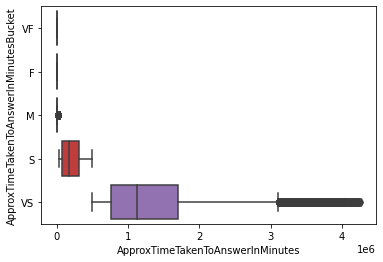

In [100]:
sns.boxplot(data = users, x = 'ApproxTimeTakenToAnswerInMinutes',y='ApproxTimeTakenToAnswerInMinutesBucket')
plt.show()

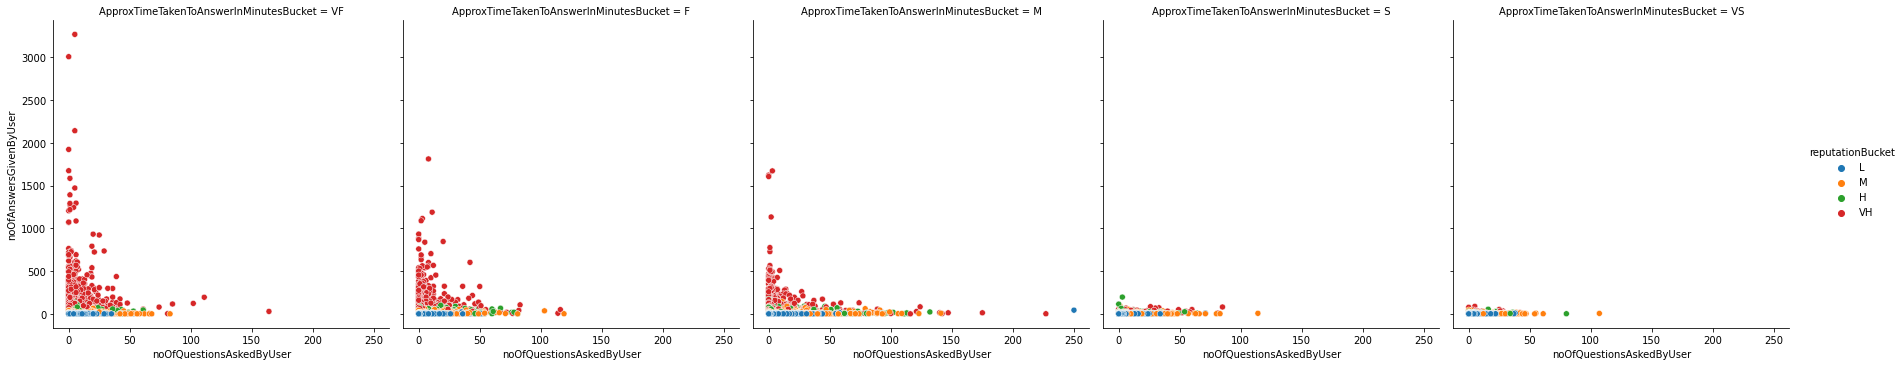

In [101]:
sns.relplot(x="noOfQuestionsAskedByUser", y="noOfAnswersGivenByUser",hue="reputationBucket",col="ApproxTimeTakenToAnswerInMinutesBucket",data=users)
plt.show()

Based on the above graph, we should depend on the users with 'VH' reputation and 'VF', 'F' and 'M' response time for more accurate and faster response.

In [102]:
#Delete temp dataframes
del avgTimetakenToAnswerInMinites
del questionsWithPopularTags
del questionsWithLesspopularTags
del dataScienceQuestion

# Till now basic data cleaning, manipulation, analysis and feature engineering is done.

## Let us convert this data into appropriate format to solve the below objective.

1. When a user raises a question with a data science tag ('python', 'r', 'matlab', 'sas', 'excel', 'sql'), then Stack Overflow sends the notification to the relevant users.

2. When a user provides a data science tag ('python', 'r', 'matlab', 'sas', 'excel', 'sql') to their question, then Stack Overflow should come up with the expected approximate time to get it answered.

3. While a user raises a question, Stack Overflow wants to provide some suggestions to the users to get their queries answered quickly.

4. Let’s say Stack Overflow also wants to post some details on its job website to help various employees understand the subjects or topics trending in the industry.

In [103]:
users.head()

,id,creation_date,last_access_date,reputation,up_votes,down_votes,views,noOfQuestionsAskedByUser,noOfAnswersGivenByUser,reputationBucket,ApproxTimeTakenToAnswerInMinutes,ApproxTimeTakenToAnswerInMinutesBucket
0,26,2008-08-01 12:18:14.520000+00:00,2018-04-11 04:40:35.660000+00:00,11820,565,67,3547,16,27,M,26.100000,F
1,1109,2008-08-12 12:16:58.610000+00:00,2019-08-31 11:39:52.280000+00:00,116072,457,136,6905,5,58,VH,270.086667,M
2,364174,2010-06-11 03:34:57.137000+00:00,2019-08-29 18:37:35.027000+00:00,325,25,1,60,2,2,L,675723.916667,VS
3,61,2008-08-01 14:21:00.573000+00:00,2019-08-30 07:11:58.297000+00:00,22779,1321,219,1731,3,10,H,96.596667,M
4,20709,2008-09-22 20:03:39.710000+00:00,2019-09-01 01:17:38.133000+00:00,978,73,2,96,0,2,L,64455.090000,S


As we have seen from our analysis we will seperate the users with users with 'VH' & 'H' reputation and 'VF', 'F' & 'M' response time for to solve first two objectives.

In [104]:
usersWithFastResponseTimeAndGoodReputation = users[((users['ApproxTimeTakenToAnswerInMinutesBucket'] == 'VF') | (users['ApproxTimeTakenToAnswerInMinutesBucket'] == 'F') | (users['ApproxTimeTakenToAnswerInMinutesBucket'] == 'M')) & ((users['reputationBucket'] == 'VH') | (users['reputationBucket'] == 'H'))]
print("No of users available: ",users.shape[0]," :: No of users with average response time is 'VF','F' & 'M' and reputation with 'VH' & 'H': ", usersWithFastResponseTimeAndGoodReputation.shape[0])
print("Percentage of users filtered out: ", 100-(usersWithFastResponseTimeAndGoodReputation.shape[0]/users.shape[0]*100))

No of users available:  465460  :: No of users with average response time is 'VF','F' & 'M' and reputation with 'VH' & 'H':  8896
Percentage of users filtered out:  98.08877239719847


Find the tags based on answers given by user and time taken to answer.

In [105]:
userTags = answers.merge(questions, how='left',left_on='ParentId',right_on="Id",validate="m:1",copy=False)

In [106]:
userTags.head()

,Id_x,OwnerUserId_x,CreationDate_x,ParentId,Score_x,QuestionCreationDate,TimetakenToAnswerInMinutes,Id_y,OwnerUserId_y,CreationDate_y,ClosedDate,Score_y,TimeTakenToClose,Tag,noOfAnswersForQuestion,DataScienceQuestion,TagInTopHundred
0,92,61,2008-08-01 14:45:37+00:00,90,13,2008-08-01 14:41:24+00:00,4.216667,90.0,58.0,2008-08-01 14:41:24+00:00,2012-12-26 03:45:49+00:00,144.0,1607 days 13:04:25,"branch,branching-and-merging,svn,tortoisesvn",3.0,False,False
1,124,26,2008-08-01 16:09:47+00:00,80,12,2008-08-01 13:57:07+00:00,132.666667,80.0,26.0,2008-08-01 13:57:07+00:00,NaT,26.0,NaT,"actionscript-3,air,flex",3.0,False,False
2,199,50,2008-08-01 19:36:46+00:00,180,1,2008-08-01 18:42:19+00:00,54.450000,180.0,2089740.0,2008-08-01 18:42:19+00:00,NaT,53.0,NaT,"algorithm,color-space,colors,language-agnostic",9.0,False,True
3,269,91,2008-08-01 23:49:57+00:00,260,4,2008-08-01 23:22:08+00:00,27.816667,260.0,91.0,2008-08-01 23:22:08+00:00,NaT,49.0,NaT,".net,c#,compiler-construction,scripting",9.0,False,True
4,307,49,2008-08-02 01:49:46+00:00,260,28,2008-08-01 23:22:08+00:00,147.633333,260.0,91.0,2008-08-01 23:22:08+00:00,NaT,49.0,NaT,".net,c#,compiler-construction,scripting",9.0,False,True


In [107]:
userTags.drop(inplace=True,axis=1,columns=['Id_x','CreationDate_x','ParentId','Score_x','QuestionCreationDate','Id_y','OwnerUserId_y','CreationDate_y','ClosedDate','Score_y','TimeTakenToClose','noOfAnswersForQuestion','TagInTopHundred'])

In [108]:
userTags.rename(columns={"OwnerUserId_x":"UserId","DataScienceQuestion":"AnsweredDataScienceQuestions"},inplace=True)

In [109]:
userTags['Tag'] = userTags['Tag'].astype(str)

In [110]:
userIdsWithFastResponseTimeAndGoodReputation = usersWithFastResponseTimeAndGoodReputation['id'].values
userTags = userTags[userTags["UserId"].isin(userIdsWithFastResponseTimeAndGoodReputation)==True]

In [111]:
userTags['Tag'] = [x.split(',') for x in userTags['Tag']]

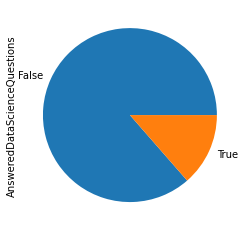

In [112]:
userTags['AnsweredDataScienceQuestions'].value_counts().plot.pie()
plt.show()

Remove all the rows which are not related to data science question.

In [113]:
userTags = userTags[userTags['AnsweredDataScienceQuestions'] == True]

In [114]:
userTags.head()

,UserId,TimetakenToAnswerInMinutes,Tag,AnsweredDataScienceQuestions
71,383,157.500000,"[sql, sql-server]",True
139,571,9.516667,"[database, diagram, sql, sql-server]",True
141,116,20.950000,"[database, diagram, sql, sql-server]",True
142,419,48.683333,"[database, diagram, sql, sql-server]",True
212,341,10.700000,"[foreign-keys, mysql, sql]",True


In [115]:
userTags = userTags.explode('Tag')

In [116]:
userTags.head()

,UserId,TimetakenToAnswerInMinutes,Tag,AnsweredDataScienceQuestions
71,383,157.500000,sql,True
71,383,157.500000,sql-server,True
139,571,9.516667,database,True
139,571,9.516667,diagram,True
139,571,9.516667,sql,True


In [117]:
userTags.drop_duplicates(inplace=True)

In [118]:
approxResponseTimeByTag = userTags.groupby(['Tag'])['TimetakenToAnswerInMinutes'].quantile(0.2).to_frame()

In [119]:
approxResponseTimeByTag.head()

,TimetakenToAnswerInMinutes
Tag,
.app,131.283333
.bash-profile,2.283333
.doc,53.516667
.htaccess,4.166667
.lib,129.000000


In [120]:
usersByTag = userTags.groupby(['Tag'])['UserId'].apply(list).to_frame()

In [121]:
usersByTag.head()

,UserId
Tag,
.app,[908494]
.bash-profile,[367273]
.doc,[126214]
.htaccess,"[68998, 295508, 245552, 300204, 2011147]"
.lib,[143305]


In [122]:
usersAndResponseTimeByTag = usersByTag.merge(approxResponseTimeByTag, how='left',on='Tag')

In [123]:
print("Total no of tages related to datascience question: " , len(usersAndResponseTimeByTag))

Total no of tages related to datascience question:  7014


In [124]:
usersAndResponseTimeByTag.reset_index(inplace=True)

In [125]:
usersAndResponseTimeByTag['UserId'] = usersAndResponseTimeByTag['UserId'].apply(lambda listofUserId: ','.join([str(userId) for userId in listofUserId]))

In [126]:
usersAndResponseTimeByTag.head()

,Tag,UserId,TimetakenToAnswerInMinutes
0,.app,908494,131.283333
1,.bash-profile,367273,2.283333
2,.doc,126214,53.516667
3,.htaccess,"68998,295508,245552,300204,2011147",4.166667
4,.lib,143305,129.000000


In [127]:
usersAndResponseTimeByTag[usersAndResponseTimeByTag['Tag'].isin(dataScienceTag)]

estimatedTimeForDataScienceTags = usersAndResponseTimeByTag[usersAndResponseTimeByTag['Tag'].isin(dataScienceTag)][['Tag','TimetakenToAnswerInMinutes']]

Estimated the time based on users with 'VH' & 'H' reputation and 'VF', 'F' & 'M' response time. So, let us verify our calculatation on how are the response time for all the questions based on all the answers given by all the users for the specific tag.

Validate according to below points:
1. To come up with estimated time to get the first answer have considered only top 2% of users and the answers given by them and taken the time at 10 percential.
2. To validate our estimated time, will consdier all the questions related to specif tag/topic and see the time at at 10 percential.

The reason to not filter out the users while validating is to validate that, when we get a new answer most probabily it will the top users who respond and the time taken to respond should less than or equal to estimated time.



In [128]:
excel = questions[questions['Tag'].str.contains('excel')]['Id'].values
matlab = questions[questions['Tag'].str.contains('matlab')]['Id'].values
python = questions[questions['Tag'].str.contains('python')]['Id'].values
r = questions[questions['Tag'].str.contains('r')]['Id'].values
sas = questions[questions['Tag'].str.contains('sas')]['Id'].values
sql = questions[questions['Tag'].str.contains('sql')]['Id'].values

In [129]:
estimatedTimeForDataScienceTags['RealTimeTakenToAnswerInMinutes'] = 0
estimatedTimeForDataScienceTags['RealTimeTakenToAnswerInMinutes'][estimatedTimeForDataScienceTags['Tag'] == 'excel'] = answers[answers['ParentId'].isin(excel)]['TimetakenToAnswerInMinutes'].quantile(0.1)
estimatedTimeForDataScienceTags['RealTimeTakenToAnswerInMinutes'][estimatedTimeForDataScienceTags['Tag'] == 'matlab'] = answers[answers['ParentId'].isin(matlab)]['TimetakenToAnswerInMinutes'].quantile(0.1)
estimatedTimeForDataScienceTags['RealTimeTakenToAnswerInMinutes'][estimatedTimeForDataScienceTags['Tag'] == 'python'] = answers[answers['ParentId'].isin(python)]['TimetakenToAnswerInMinutes'].quantile(0.1)
estimatedTimeForDataScienceTags['RealTimeTakenToAnswerInMinutes'][estimatedTimeForDataScienceTags['Tag'] == 'r'] = answers[answers['ParentId'].isin(r)]['TimetakenToAnswerInMinutes'].quantile(0.1)
estimatedTimeForDataScienceTags['RealTimeTakenToAnswerInMinutes'][estimatedTimeForDataScienceTags['Tag'] == 'sas'] = answers[answers['ParentId'].isin(sas)]['TimetakenToAnswerInMinutes'].quantile(0.1)
estimatedTimeForDataScienceTags['RealTimeTakenToAnswerInMinutes'][estimatedTimeForDataScienceTags['Tag'] == 'sql'] = answers[answers['ParentId'].isin(sql)]['TimetakenToAnswerInMinutes'].quantile(0.1)

In [130]:
estimatedTimeForDataScienceTags.rename(columns={"TimetakenToAnswerInMinutes":"EstimatedTimeToAnswerInMinutes"},inplace=True)

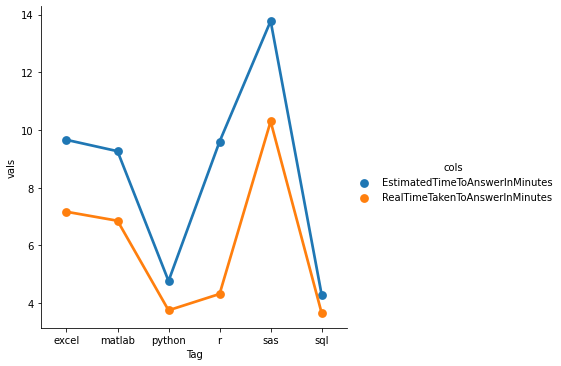

In [131]:
estimatedTimeForDataScienceTags = estimatedTimeForDataScienceTags.melt('Tag', var_name='cols',  value_name='vals')
sns.factorplot(x="Tag", y="vals", hue='cols', data=estimatedTimeForDataScienceTags)
plt.show()

From the above dataframe we have identified the average time taked and the users to send notification for secific tags.

With this we can achieve below 2 objectives:
1. When a user raises a question with a data science tag ('python', 'r', 'matlab', 'sas', 'excel', 'sql'), then Stack Overflow sends the notification to the relevant users.

2. When a user provides a data science tag ('python', 'r', 'matlab', 'sas', 'excel', 'sql') to their question, then Stack Overflow should come up with the expected approximate time to get it answered.

In [132]:
usersAndResponseTimeByTag['NoOfUsersPerTag'] = usersAndResponseTimeByTag['UserId'].str.len()

In [133]:
usersAndResponseTimeByTag.head()

,Tag,UserId,TimetakenToAnswerInMinutes,NoOfUsersPerTag
0,.app,908494,131.283333,6
1,.bash-profile,367273,2.283333,6
2,.doc,126214,53.516667,6
3,.htaccess,"68998,295508,245552,300204,2011147",4.166667,34
4,.lib,143305,129.000000,6


In [134]:
len(usersAndResponseTimeByTag[usersAndResponseTimeByTag['NoOfUsersPerTag'] > 300])/len(usersAndResponseTimeByTag)*100

7.171371542629028

Let us try to achieve out 3rd objective
3. While a user raises a question, Stack Overflow wants to provide some suggestions to the users to get their queries answered quickly.

In [135]:
tagsDict = {}
def setkey(key, value):
  if key not in tagsDict:
    tagsDict[key] = value
  else:
    tagsDict[key].extend(value)

In [136]:
def buildSupportingTagsForTopHundred(tagsFromQuestion):

  listOfTagsFromQuestion = tagsFromQuestion.strip().split(",")
  for tag in dataScienceTag:
    if tag in listOfTagsFromQuestion:
      setkey(tag,listOfTagsFromQuestion)
    else:
      continue

In [137]:
questions['Tag'].apply(lambda tags:buildSupportingTagsForTopHundred(tags))

0          None
1          None
2          None
3          None
4          None
           ... 
1249757    None
1249758    None
1249759    None
1249760    None
1249761    None
Name: Tag, Length: 1249762, dtype: object

In [138]:
supportingtagsByTag = pd.DataFrame(tagsDict.items(), columns=['Tag', 'SupportingTags'])

In [139]:
supportingtagsByTag['SupportingTags'] = supportingtagsByTag['SupportingTags'].apply(sorted).apply(list)

In [140]:
supportingtagsByTag = supportingtagsByTag.explode('SupportingTags')

In [141]:
supportingtagsByTag = supportingtagsByTag[~(supportingtagsByTag['Tag'] == supportingtagsByTag['SupportingTags'])]

In [142]:
len(supportingtagsByTag)

270697

In [143]:
supportingtagsByTag = supportingtagsByTag.value_counts().to_frame()

In [144]:
supportingtagsByTag.reset_index(inplace=True)

In [145]:
supportingtagsByTag.head()

,Tag,SupportingTags,0
0,sql,mysql,8287
1,sql,sql-server,7908
2,python,django,6270
3,excel,vba,3936
4,python,python-2.7,3691


In [146]:
supportingtagsByTag.rename(columns={0:"CombinationCount"},inplace=True)

In [147]:
noOfSupportingtags = len(supportingtagsByTag)

In [148]:
supportingtagsByTag = supportingtagsByTag[supportingtagsByTag['CombinationCount'] > 50]

Print the number of supporting tags after filtering

In [149]:
len(supportingtagsByTag)

754

In [150]:
supportingtagsByTag_pivotetable = pd.pivot_table(data=supportingtagsByTag, index='SupportingTags',columns='Tag', values='CombinationCount')

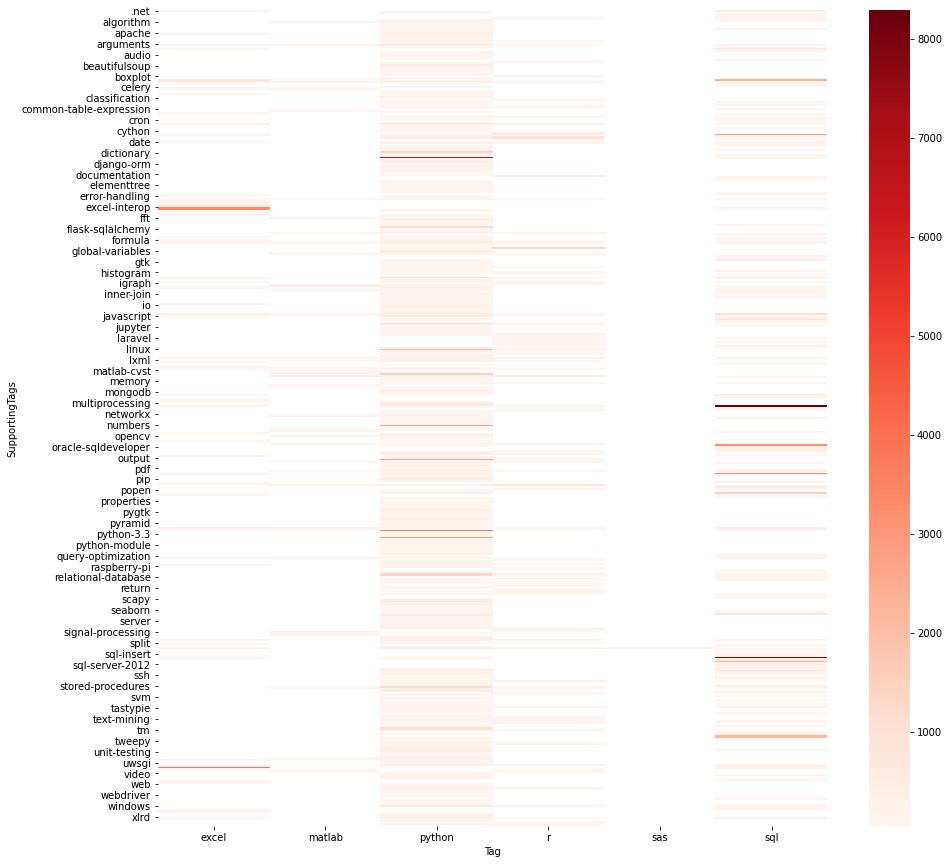

In [151]:
plt.figure(figsize=(15, 15))
sns.heatmap(supportingtagsByTag_pivotetable,cmap="Reds",)
plt.show()

From the above table we can identify and suggest the tags based on the initial tag. 

Some use cases are mentioned below:
1. If a question is created with python tag, we can identify all the tags which was tagged with python and provied the suggestion to be more specific based on all the supporting tags we have identified. 
2. If a question is raised with supporting tag, for examlpe date as tag, it s very generic. So we can suggested the languages from more popular combinaion to least and once a programming language tag is selected we can suggested few more tags based on popularity. 
3. In a question data frame, we have created a column withh all the tags associated to it. We can use it to suggest the the queston as well as tags from the questions.



Let us look into below objective.

Let’s say Stack Overflow also wants to post some details on its job website to help various employees understand the subjects or topics trending in the industry.

The top 100 trending topics in industry.

In [152]:
tags_with_count.head()

,Tag,Count
0,javascript,124155
1,java,115212
2,c#,101186
3,php,98808
4,android,90659


In [153]:
topFiftyTagsWithNoOfQuestions = tags_with_count.head(50)

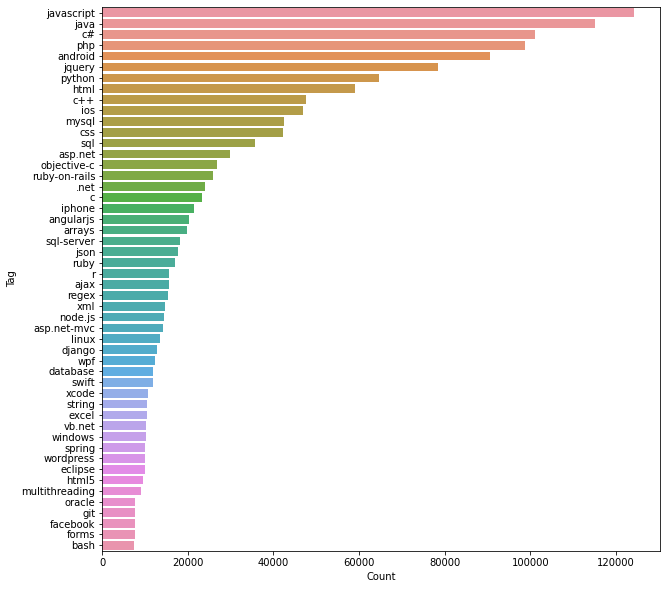

In [154]:
plt.figure(figsize=(10, 10))
sns.barplot(y=topFiftyTagsWithNoOfQuestions['Tag'],x=topFiftyTagsWithNoOfQuestions['Count'])
plt.show()

The above bar graph clearly shows the top 50 trending topics.

# Database Operation

Used to stor data in aws RDS. Copied it here for reference.

In [155]:
# Importing the library
import mysql.connector as sql

In [156]:
# Connector object

dbc = sql.connect(
host = "stackoverflow-instance.c1cerf7ai8ri.us-east-1.rds.amazonaws.com",
user = "master",
passwd = "stackoverflow",
port = 3306,
db = "stackoverflow"
)

In [157]:
cur = dbc.cursor()

In [158]:
#cur.execute("DROP TABLE TAG_USERS")
#cur.execute("DROP TABLE TAG_RESPONSETIME")
#cur.execute("DROP TABLE SUPPORTING_TAGS")

In [159]:
# Creating the tables
cur.execute("CREATE TABLE IF NOT EXISTS TAG_USERS (tag VARCHAR(255), userIds VARCHAR(255))")
cur.execute("CREATE TABLE IF NOT EXISTS TAG_RESPONSETIME (tag VARCHAR(255), responseTime DOUBLE)")
cur.execute("CREATE TABLE IF NOT EXISTS SUPPORTING_TAGS (tag VARCHAR(255), supportingTags VARCHAR(255), count INT)")

In [160]:
tagUser_insert_query = "insert into TAG_USERS VALUES (%s,%s)"
tagUserData = list(zip(usersAndResponseTimeByTag['Tag'],usersAndResponseTimeByTag['UserId']))

In [161]:
tagResponse_insert_query = "insert into TAG_RESPONSETIME VALUES (%s,%s)"
tagResponseData = list(zip(usersAndResponseTimeByTag['Tag'],usersAndResponseTimeByTag['TimetakenToAnswerInMinutes']))

In [162]:
supportingTags_insert_query = "insert into SUPPORTING_TAGS VALUES (%s,%s,%s)"
supportingTagsData = list(zip(supportingtagsByTag['Tag'],supportingtagsByTag['SupportingTags'],supportingtagsByTag['CombinationCount']))

In [163]:
try:
    cur.executemany(tagUser_insert_query,tagUserData)
    cur.executemany(tagResponse_insert_query,tagResponseData)
    cur.executemany(supportingTags_insert_query,supportingTagsData)
except (sql.Error,sql.Warning) as e:
    print(e)

In [164]:
cur.execute("SELECT tag, userIds FROM TAG_USERS")
result = cur.fetchall()
print(result)

[('.app', '908494'), ('.bash-profile', '367273'), ('.doc', '126214'), ('.htaccess', '68998,295508,245552,300204,2011147'), ('.lib', '143305'), ('.net', '91,116,1249,1737192,13087,12707,16942,1659,11492,15541,12725,1659,18255,27637,8220,7280,1559,2385,58114,31641,70157,64262,4525,84651,76456,86473,8155,77507,20471,32133,40347,57428,78182,95810,50552,18255,95810,126214,6068,6335,4203,119081,111124,13302,119'), ('.net-2.0', '39809,168703,607314,22656'), ('.net-3.5', '2648,13279,1965,16391,18255,183934,870604,3651607'), ('.net-4.5', '529618'), ('.net-assembly', '17034'), ('.obj', '505088,4014959'), ('16-bit', '3250829'), ('2d', '31676,370756,847601,21640,951890,500584,42973,623518,1219006,174728,110026,249341,355230,3545273,846892,1485872,3293881,2141635,2487184,4137985,4785185,642070,3877726,670206'), ('2d-games', '3877726'), ('2to3', '100297,145400,238639,1427416,104349,157176'), ('3-tier', '109035'), ('32bit-64bit', '256138,496445,524475'), ('3d', '46914,11397,11361,181765,211116,63309,

In [165]:
cur.execute("SELECT tag, responseTime FROM TAG_RESPONSETIME")
result = cur.fetchall()
print(result)

[('.app', 131.28333333333333), ('.bash-profile', 2.283333333333333), ('.doc', 53.516666666666666), ('.htaccess', 4.166666666666667), ('.lib', 129.0), ('.net', 4.316666666666666), ('.net-2.0', 5.863333333333333), ('.net-3.5', 3.046666666666667), ('.net-4.5', 44.483333333333334), ('.net-assembly', 57.1), ('.obj', 12.643333333333333), ('16-bit', 21.316666666666666), ('2d', 7.296666666666667), ('2d-games', 1712.5333333333333), ('2to3', 1.8666666666666667), ('3-tier', 2.5), ('32bit-64bit', 18.3), ('3d', 17.12666666666667), ('3d-reconstruction', 306.76666666666665), ('4d', 12.95), ('4gl', 1037.2), ('64bit', 7.2), ('7zip', 20.723333333333336), ('a-star', 7.226666666666667), ('aac', 81.86666666666666), ('abaqus', 18.87), ('abbreviation', 25.133333333333333), ('abc', 8.066666666666666), ('abort', 10498.363333333333), ('absolute-path', 16.26), ('absolute-value', 1.8666666666666667), ('abstract', 9.506666666666668), ('abstract-base-class', 3.3200000000000003), ('abstract-class', 10.22), ('abstrac

In [166]:
cur.execute("SELECT tag, supportingTags, count  FROM SUPPORTING_TAGS")
result = cur.fetchall()
print(result)

[('sql', 'mysql', 8287), ('sql', 'sql-server', 7908), ('python', 'django', 6270), ('excel', 'vba', 3936), ('python', 'python-2.7', 3691), ('sql', 'php', 3459), ('excel', 'excel-vba', 3428), ('sql', 'oracle', 3230), ('python', 'python-3.x', 2854), ('python', 'pandas', 2684), ('python', 'numpy', 2655), ('sql', 'database', 2605), ('sql', 'c#', 2310), ('sql', 'sql-server-2008', 2295), ('sql', 'tsql', 2167), ('python', 'list', 2084), ('python', 'matplotlib', 1689), ('sql', 'postgresql', 1565), ('python', 'regex', 1458), ('python', 'dictionary', 1445), ('r', 'ggplot2', 1384), ('python', 'string', 1199), ('python', 'flask', 1164), ('sql', 'java', 1147), ('sql', 'join', 1096), ('python', 'tkinter', 1080), ('python', 'google-app-engine', 1030), ('r', 'dataframe', 971), ('python', 'arrays', 946), ('python', 'csv', 938), ('excel', 'c#', 924), ('python', 'json', 872), ('sql', 'asp.net', 850), ('sql', 'ms-access', 845), ('python', 'mysql', 805), ('sql', 'select', 798), ('sql', 'sql-server-2005', 78